In [192]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

In [193]:
df = pd.read_csv('../data/cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          6169 non-null   int64  
 1   Longitude             6169 non-null   float64
 2   Latitude              6169 non-null   float64
 3   Average Cost for two  6169 non-null   int64  
 4   Has Table booking     6169 non-null   int64  
 5   Has Online delivery   6169 non-null   int64  
 6   Is delivering now     6169 non-null   int64  
 7   Price range           6169 non-null   int64  
 8   Aggregate rating      6169 non-null   float64
 9   Votes                 6169 non-null   int64  
 10  Restaurant Name len   6169 non-null   int64  
 11  Address len           6169 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 578.5 KB


In [194]:
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

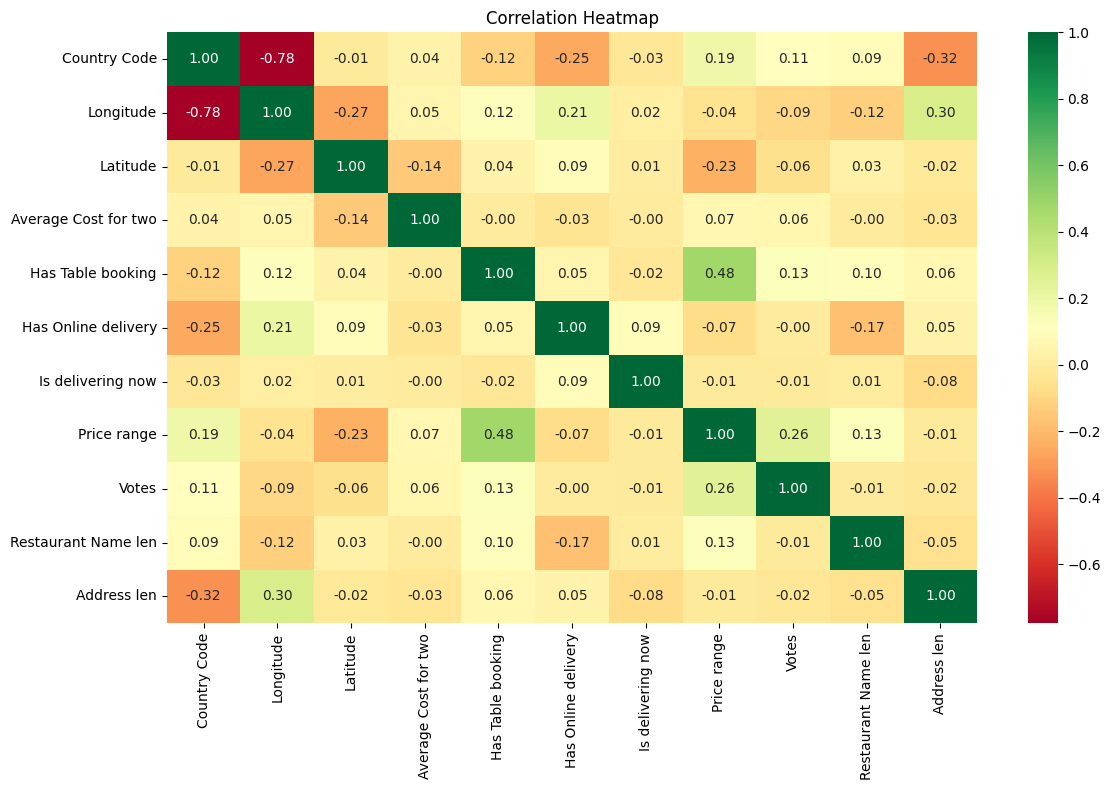

In [195]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [196]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_result = lr.predict(X_test)

In [197]:
lr_score = r2_score(y_test, lr_result)
print('The r2 score of Linear Regression:',lr_score)

The r2 score of Linear Regression: 0.3678293078549555


In [198]:
lr_mae = mean_absolute_error(y_test, lr_result)
print('The Mean Absolute Error of Linear Regression:',lr_mae)

The Mean Absolute Error of Linear Regression: 0.3428344823340031


In [199]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_result = rf.predict(X_test)

In [200]:
rf_score = r2_score(y_test, rf_result)
print('The r2 score of Random Forest:',rf_score)

The r2 score of Random Forest: 0.571259616098126


In [201]:
rf_mae = mean_absolute_error(y_test, rf_result)
print('The Mean Absolute Error of Random Forest:',rf_mae)

The Mean Absolute Error of Random Forest: 0.2792358184764992


In [202]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_result = dt.predict(X_test)

In [203]:
dt_score = r2_score(y_test, dt_result)
print('The r2 score od Decision Tree:',dt_score)

The r2 score od Decision Tree: 0.05404951428646332


In [204]:
dt_mae = mean_absolute_error(y_test, dt_result)
print('The Mean Absolute Error of Decision Tree:',dt_mae)

The Mean Absolute Error of Decision Tree: 0.40632090761750406


In [205]:
final_result = [[lr_score, lr_mae], [rf_score, rf_mae], [dt_score, dt_mae]]
final_result = pd.DataFrame(final_result, columns=['R2 Score', 'Mean Absolute Error'], index=['Linear Regression', 'Random Forest', 'Decision Tree'])
final_result

,R2 Score,Mean Absolute Error
Linear Regression,0.367829,0.342834
Random Forest,0.571260,0.279236
Decision Tree,0.054050,0.406321


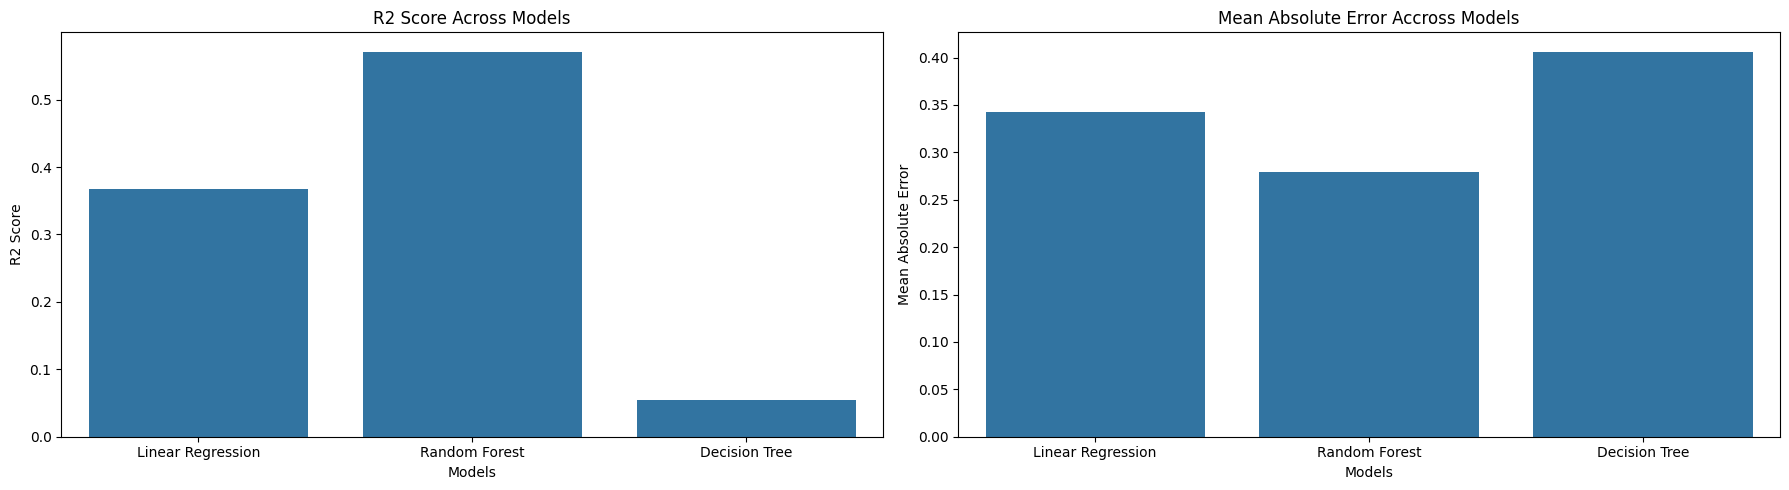

In [206]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.barplot(x=final_result.index, y=final_result['R2 Score'], ax=ax[0])
ax[0].set_xlabel('Models') 
ax[0].set_title('R2 Score Across Models')

sns.barplot(x=final_result.index, y=final_result['Mean Absolute Error'], ax=ax[1])
ax[1].set_xlabel('Models')
ax[1].set_title('Mean Absolute Error Accross Models')
plt.tight_layout()
plt.show()

Random Forest
- Best R² = 0.571 → Explains ~57% of the target variability
- Lowest MAE = 0.279 → Most accurate predictions on average 
Best-performing model overall